In [ ]:
# INSTRUCTIONS 

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#!pip uninstall gradientcorrection  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main

  Using cached https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main


In [3]:
import numpy as np
import gradientcorrection
from gradientcorrection import layers, utils, metrics, helper, explain, model_zoo, geomath, plotter

In [4]:
# MOCK(TEST) PATH
results_path = utils.make_directory('drive/My Drive/results_mock', 'task3')  #utils.make_directory('../results', 'task3')
params_path = utils.make_directory(results_path, 'model_params')  #utils.make_directory(results_path, 'model_params')
analysis_results_path = utils.make_directory(results_path, 'analysis')
angles_path = utils.make_directory(analysis_results_path, 'angles')

In [5]:
##Data

#------------------------------------------------------------------------
# load data
data_path = 'drive/My Drive/data/synthetic_code_dataset.h5'
data = helper.load_data(data_path)
x_train, y_train, x_valid, y_valid, x_test, y_test = data

# load ground truth values
test_model = helper.load_synthetic_models(data_path, dataset='test')
true_index = np.where(y_test[:,0] == 1)[0]
X = x_test[true_index][:500]  
X_model = test_model[true_index][:500] 

# SALIENCY and IG improvements. Performance. 

In [6]:
#Saliency and IG load
#Load the interpretability data.
from numpy import loadtxt
SAL_AUROC={}
SAL_AUROC_c={}
SAL_AUPR={}
SAL_AUPR_c={}
SAL_COSINE={}
SAL_COSINE_c={}
IG_AUROC={}
IG_AUROC_c={}
IG_AUPR={}
IG_AUPR_c={}
IG_COSINE={}
IG_COSINE_c={}
Performance={}

model_names = ['cnn-local', 'cnn-dist'] 
activations = ['relu', 'exponential'] 

for model_name in model_names:
    for activation in activations:

        #Saliency file names
        filenameSAL_AUROC = analysis_results_path +'/' + model_name + "_" + activation + "_" + "saliencyAUROC.txt"
        filenameSAL_AUPR = analysis_results_path +'/' + model_name + "_" + activation + "_" + "saliencyAUPR.txt"
        filenameSAL_COSINE = analysis_results_path +'/' + model_name + "_" + activation + "_" + "saliencyCOSINE.txt"

        filenameSAL_AUROC_c = analysis_results_path +'/' + model_name + "_" + activation + "_" + "saliencyAUROC_corrected.txt"
        filenameSAL_AUPR_c = analysis_results_path +'/' + model_name + "_" + activation + "_" + "saliencyAUPR_corrected.txt"
        filenameSAL_COSINE_c = analysis_results_path +'/' + model_name + "_" + activation + "_" + "saliencyCOSINE_corrected.txt"

        # Integrated gradient file names 
        filenameIG_AUROC = analysis_results_path +'/' + model_name + "_" + activation + "_" + "IG_AUROC.txt"
        filenameIG_AUPR = analysis_results_path +'/' + model_name + "_" + activation + "_" + "IG_AUPR.txt"
        filenameIG_COSINE = analysis_results_path +'/' + model_name + "_" + activation + "_" + "IG_COSINE.txt"

        filenameIG_AUROC_c = analysis_results_path +'/' + model_name + "_" + activation + "_" + "IG_AUROC_corrected.txt"
        filenameIG_AUPR_c = analysis_results_path +'/' + model_name + "_" + activation + "_" + "IG_AUPR_corrected.txt"
        filenameIG_COSINE_c = analysis_results_path +'/' + model_name + "_" + activation + "_" + "IG_COSINE_corrected.txt"

        #Performance
        filenamePERFORM = analysis_results_path +'/' + model_name + "_" + activation + "_" + "performance.txt"

        #LOAD

        #Saliency
        SAL_AUROC[model_name + "_" + activation] = np.array(loadtxt(filenameSAL_AUROC, comments="#", delimiter="\n", unpack=False))
        SAL_AUPR[model_name + "_" + activation] = np.array(loadtxt(filenameSAL_AUPR, comments="#", delimiter="\n", unpack=False))
        SAL_COSINE[model_name + "_" + activation] = np.array(loadtxt(filenameSAL_COSINE, comments="#", delimiter="\n", unpack=False))

        SAL_AUROC_c[model_name + "_" + activation] = np.array(loadtxt(filenameSAL_AUROC_c, comments="#", delimiter="\n", unpack=False))
        SAL_AUPR_c[model_name + "_" + activation] = np.array(loadtxt(filenameSAL_AUPR_c, comments="#", delimiter="\n", unpack=False))
        SAL_COSINE_c[model_name + "_" + activation] = np.array(loadtxt(filenameSAL_COSINE_c, comments="#", delimiter="\n", unpack=False))

        #IG
        IG_AUROC[model_name + "_" + activation] = np.array(loadtxt(filenameIG_AUROC, comments="#", delimiter="\n", unpack=False))
        IG_AUPR[model_name + "_" + activation] = np.array(loadtxt(filenameIG_AUPR, comments="#", delimiter="\n", unpack=False))
        IG_COSINE[model_name + "_" + activation] = np.array(loadtxt(filenameIG_COSINE, comments="#", delimiter="\n", unpack=False))

        IG_AUROC_c[model_name + "_" + activation] = np.array(loadtxt(filenameIG_AUROC_c, comments="#", delimiter="\n", unpack=False))
        IG_AUPR_c[model_name + "_" + activation] = np.array(loadtxt(filenameIG_AUPR_c, comments="#", delimiter="\n", unpack=False))
        IG_COSINE_c[model_name + "_" + activation] = np.array(loadtxt(filenameIG_COSINE_c, comments="#", delimiter="\n", unpack=False))

        #Performance
        Performance[model_name + "_" + activation] = np.array(loadtxt(filenamePERFORM, comments="#", delimiter="\n", unpack=False))

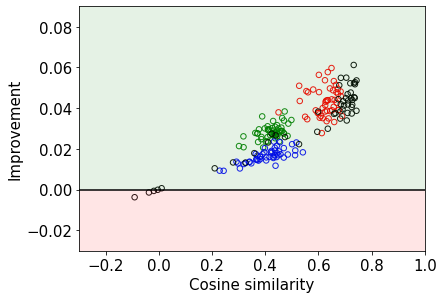

In [7]:
# Saliency Cosine
plotter.plot_improvement(SAL_COSINE, SAL_COSINE_c,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.09)

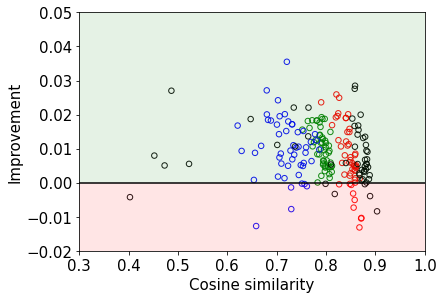

In [9]:
#Saliency AUROC
plotter.plot_improvement(SAL_AUROC, SAL_AUROC_c,  x_min=0.3, x_max=1, y_min=-0.02, y_max=0.05)

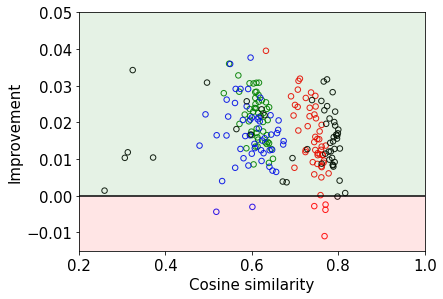

In [10]:
#Saliency AUPR
plotter.plot_improvement(SAL_AUPR, SAL_AUPR_c,  x_min=0.2, x_max=1, y_min=-0.015, y_max=0.05)

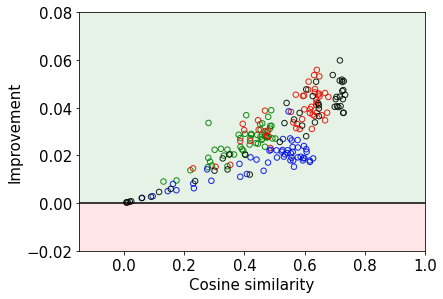

In [11]:
# IG Cosine 
plotter.plot_improvement(IG_COSINE, IG_COSINE_c,  x_min=-0.15, x_max=1, y_min=-0.02, y_max=0.08)

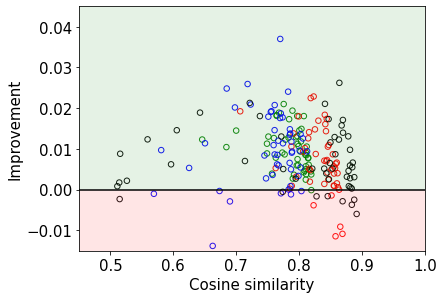

In [12]:
#IG AUROC
plotter.plot_improvement(IG_AUROC, IG_AUROC_c,  x_min=0.45, x_max=1, y_min=-0.015, y_max=0.045)

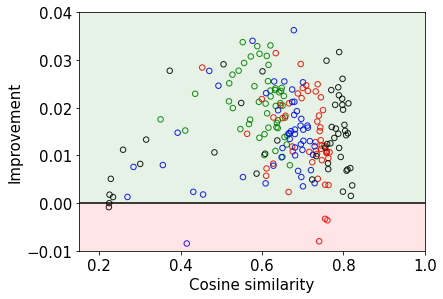

In [13]:
#IG AUPR
plotter.plot_improvement(IG_AUPR, IG_AUPR_c,  x_min=0.15, x_max=1, y_min=-0.01, y_max=0.04)

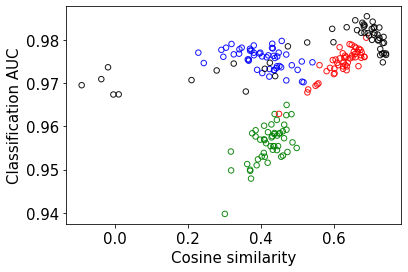

In [8]:
# 4-Saliency Cosine
plotter.plot_attribution_vs_performance(SAL_COSINE, Performance, x_min=0.92, x_max=1)

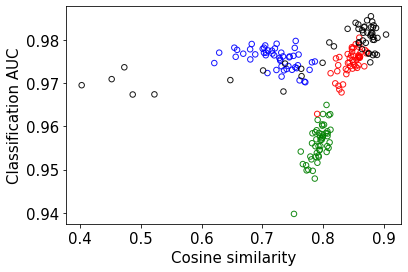

In [9]:
# SaliencyAUROC
plotter.plot_attribution_vs_performance(SAL_AUROC, Performance, x_min=0.92, x_max=1)

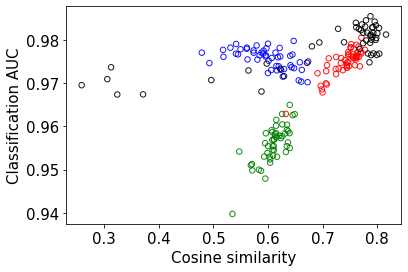

In [10]:
# SaliencyAUPR
plotter.plot_attribution_vs_performance(SAL_AUPR, Performance, x_min=0.92, x_max=1)

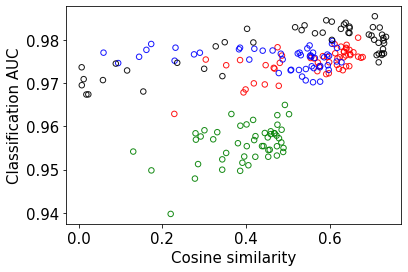

In [11]:
# IG Cosine
plotter.plot_attribution_vs_performance(IG_COSINE, Performance, x_min=0.92, x_max=1)

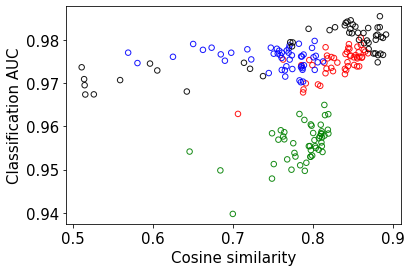

In [12]:
# IG-AUROC
plotter.plot_attribution_vs_performance(IG_AUROC, Performance, x_min=0.92, x_max=1)

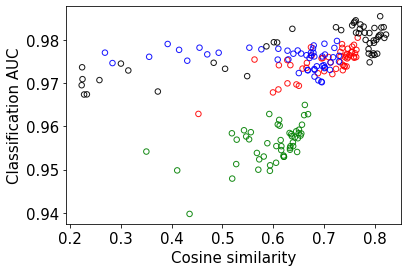

In [13]:
# IG-AUPR
plotter.plot_attribution_vs_performance(IG_AUPR, Performance, x_min=0.92, x_max=1)

# ANGLE STATISTICS 

|

In [10]:
#Load angles

from numpy import loadtxt
 
num_trials = 50
model_name = 'cnn-dist' 
activation = 'exponential'  
sine=[]
improvement=[]
saliency_wild1=[]
saliency_wild2=[] 
for trial in range (0,num_trials): 
    name = model_name+'_'+activation+'_'+str(trial)
    filenameANGLES = angles_path +'/' + name + "_" + "angles.txt"
    filenameIMPROVEMENT = angles_path +'/' + name + "_" + "improvement.txt"
    filenameWILD1 = angles_path +'/' + name + "_" + "saliency_wild1.txt"
    filenameWILD2 = angles_path +'/' + name + "_" + "saliency_wild2.txt"        

    #Load angles, improvement, wild saliencies. 
    sine.append ( np.array(loadtxt(filenameANGLES, comments="#", delimiter=",", unpack=False)) )
    improvement.append ( np.array(loadtxt(filenameIMPROVEMENT, comments="#", delimiter=",", unpack=False)) )
    saliency_wild1.append ( np.array(loadtxt(filenameWILD1, comments="#", delimiter=",", unpack=False)) )
    saliency_wild2.append ( np.array(loadtxt(filenameWILD2, comments="#", delimiter=",", unpack=False)) )     

filenameANG30 = angles_path +'/' + model_name+'_'+activation + "_" + "large_angles30.txt"    
filenameANG45 = angles_path +'/' + model_name+'_'+activation + "_" + "large_angles45.txt"  
filenameANG60 = angles_path +'/' + model_name+'_'+activation + "_" + "large_angles60.txt" 
count_large_angles30 = np.array(loadtxt(filenameANG30, comments="#", delimiter=",", unpack=False)) 
count_large_angles45 = np.array(loadtxt(filenameANG45, comments="#", delimiter=",", unpack=False)) 
count_large_angles60 = np.array(loadtxt(filenameANG60, comments="#", delimiter=",", unpack=False))    

filenameENS_ANG = angles_path +'/' + model_name+'_'+activation + "_" + "ensemble_angles.txt"
sine_ensemble = np.array(loadtxt(filenameENS_ANG, comments="#", delimiter=",", unpack=False)) 

sine=np.array(sine)
improvement = np.array(improvement)
saliency_wild1=np.array(saliency_wild1)
saliency_wild2=np.array(saliency_wild2)

(array([7.13865633e-06, 9.88429338e-06, 2.30633512e-05, 4.33810654e-05,
        6.36987796e-05, 8.01726019e-05, 1.08178100e-04, 1.52657420e-04,
        2.08668416e-04, 2.58639010e-04, 3.76152276e-04, 4.35458036e-04,
        5.11786746e-04, 5.57913449e-04, 6.73779332e-04, 7.88546961e-04,
        8.72563455e-04, 9.92822357e-04, 1.04828423e-03, 1.16964138e-03,
        1.29978458e-03, 1.40686442e-03, 1.55897272e-03, 1.70284410e-03,
        1.91370902e-03, 2.10260885e-03, 2.45954167e-03, 2.76760215e-03,
        3.11904369e-03, 3.64400949e-03, 3.95042259e-03, 4.46275846e-03,
        5.08052680e-03, 5.92563388e-03, 6.62522220e-03, 7.65593435e-03,
        8.98042966e-03, 1.05959625e-02, 1.18435800e-02, 1.30571516e-02,
        1.50444437e-02, 1.75797649e-02, 1.85720381e-02, 1.96258136e-02,
        2.06609188e-02, 2.18794325e-02, 2.27190483e-02, 2.29041043e-02,
        2.31726276e-02, 2.23961614e-02, 2.18118899e-02, 2.10711170e-02,
        1.94006714e-02, 1.76407180e-02, 1.65413650e-02, 1.496921

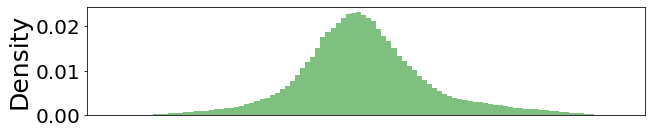

In [11]:
import matplotlib.pyplot as plt

sine_flattened = np.array(sine.reshape(len(sine)*len(sine[0])*len(sine[0,0]),))
improvement_flattened = np.array(improvement.reshape(len(improvement)*len(improvement[0])*len(improvement[0,0]),))
index = np.where(np.abs(improvement_flattened)>0)[0]  #No NAs
sine_flattened=sine_flattened[index]

plt.figure(figsize=(10,2))
plt.ylabel('Density', fontsize=25)
#plt.xticks(fontsize=22)
plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False) 
plt.yticks(ticks=[0.0, 0.01, 0.02], fontsize=20)
plt.hist(sine_flattened, 100, density=True, alpha=0.5, color='g')

(-0.75, 1.0)

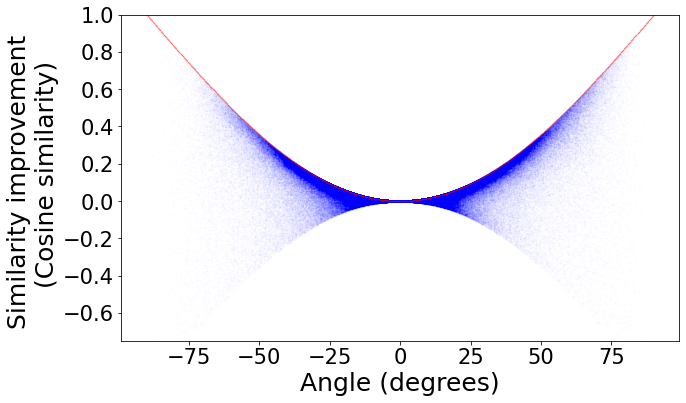

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

#fig = plt.figure()
#ax1 = fig.add_subplot(111)

plt.scatter(sine, improvement, s=0.3, c='b', marker="o", label='zadaca', alpha=0.01)  #plt.scatter(sine, improvement, s=0.3, c='b', marker="o", label='zadaca', alpha=0.01)
plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Similarity improvement \n (Cosine similarity)', fontsize=25)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)

#Highlight bins
sine_flattened = np.array(sine.reshape(len(sine)*len(sine[0])*len(sine[0,0]),))
bin_map=np.linspace(-90,90,1000)
bin_points = 1-np.abs(np.cos(bin_map/180*3.1416))
plt.scatter(bin_map, bin_points, s=0.1, c='red', marker="o", label='zadaca', alpha=0.5)

plt.ylim(-0.75,1)           
#
#plt.savefig('drive/My Drive/results/U_scatter.pdf', dpi='figure')  
#plt.show()

In [13]:
print ( np.mean(np.nan_to_num(sine_flattened)) )
print ( np.std(np.nan_to_num(sine_flattened)) )
print(sine_flattened.shape)

0.9568862077043354
29.340687895738427
(5000000,)


(-0.6, 0.8)

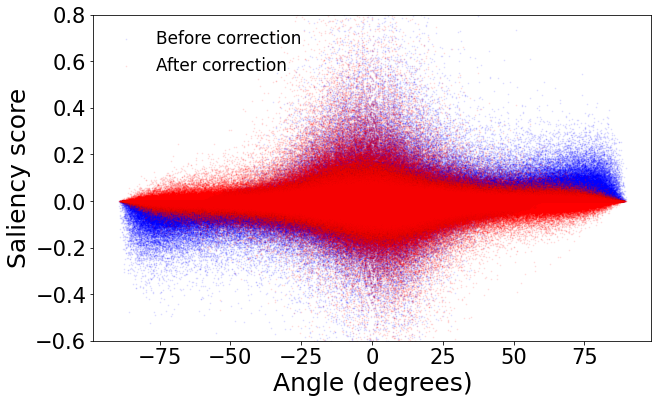

In [14]:
# Only negative 
import matplotlib.pyplot as plt

#fig = plt.figure()
#ax1 = fig.add_subplot(111)
plt.figure(figsize=(10, 6))

#DIFFERENT DEFINITION
X_model_normalized = ( np.log2(4) + np.sum(np.swapaxes(X_model, 1,2)*np.log2(np.swapaxes(X_model, 1,2)+1e-10),axis=2, keepdims=True)   )
X_model_normalized_50 = []
for i in range (0,num_trials):
    X_model_normalized_50.append(X_model_normalized[:,:,0])   
X_model_normalized_50=np.array(X_model_normalized_50)    

plt.scatter(sine[X_model_normalized_50==0], saliency_wild1[X_model_normalized_50==0], s=0.5, c='b', marker="o",  alpha=0.1, label='Before correction')
plt.scatter(sine[X_model_normalized_50==0], saliency_wild2[X_model_normalized_50==0], s=0.5, c='r', marker="o",  alpha=0.1, label='After correction')

plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Saliency score', fontsize=25)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.legend(loc='upper left', fontsize=17, frameon=False);
plt.ylim(-0.6,0.8)

(0.0, 10.0)

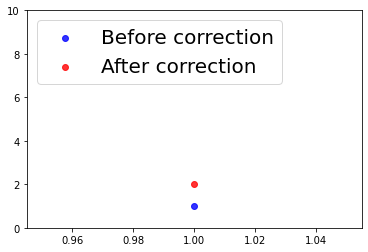

In [15]:
plt.scatter(1, 1, s=35.5, c='b', marker="o",  alpha=0.8, label='Before correction')
plt.scatter(1, 2, s=35.5, c='r', marker="o",  alpha=0.8, label='After correction')
plt.legend(loc='upper left', fontsize=20);
plt.ylim(0,10)

(array([2.30568695e-05, 1.13034897e-04, 2.59108601e-04, 4.33581620e-04,
        6.31111508e-04, 8.28219624e-04, 1.02321888e-03, 1.13203606e-03,
        1.29287178e-03, 1.43768017e-03, 1.53482832e-03, 1.62115099e-03,
        1.73517002e-03, 1.82107092e-03, 1.90458178e-03, 2.03828350e-03,
        2.12249731e-03, 2.22794031e-03, 2.35742432e-03, 2.50096739e-03,
        2.62651486e-03, 2.77385388e-03, 2.93075306e-03, 3.08287216e-03,
        3.28166737e-03, 3.49986409e-03, 3.78990263e-03, 3.98405835e-03,
        4.32822430e-03, 4.58466168e-03, 4.97072365e-03, 5.37196942e-03,
        5.74326937e-03, 6.26795374e-03, 6.71939038e-03, 7.24252825e-03,
        7.81402932e-03, 8.44781205e-03, 9.09452912e-03, 9.68641583e-03,
        1.04690841e-02, 1.11129893e-02, 1.18572763e-02, 1.26371328e-02,
        1.32856775e-02, 1.39517961e-02, 1.45151429e-02, 1.49373367e-02,
        1.54801573e-02, 1.57647128e-02, 1.58867455e-02, 1.59006639e-02,
        1.57571209e-02, 1.54294040e-02, 1.49722032e-02, 1.442038

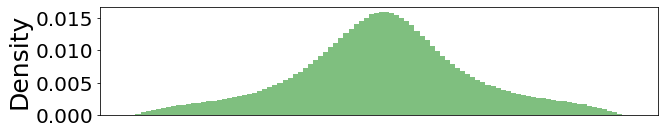

In [16]:
sine_negative = sine[X_model_normalized_50==0] 

plt.figure(figsize=(10,2))
plt.ylabel('Density', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=20)
plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False) 
plt.hist(sine_negative, 100, density=True, alpha=0.5, color='g')

(-2.0, 50.0)

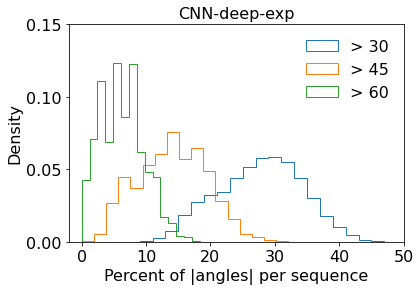

In [17]:
#plt.figure(figsize=(10,2))
plt.hist(count_large_angles30,20,  histtype='step', stacked=True, fill=False, label = '> 30', density=True)
plt.hist(count_large_angles45,18,  histtype='step', stacked=True, fill=False, label = '> 45', density=True)
plt.hist(count_large_angles60,18,  histtype='step', stacked=True, fill=False, label = '> 60', density=True)

plt.ylabel('Density', fontsize=16)
plt.xlabel('Percent of |angles| per sequence', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks([0, 0.05, 0.10, 0.15], fontsize=16)
plt.legend(loc='upper right', fontsize=16, frameon=False);
plt.title("CNN-deep-exp", fontsize=16, loc='center', pad=None)
plt.xlim(-2,50)

In [18]:
### Angle standard deviation, and percentages of angles above cetrain thresholds. 

sine_flat = sine.reshape(-1)
sine_no_nan = sine_flat [np.logical_not( np.isnan(sine_flat))]
print(np.std(sine_no_nan))

print()

print(np.average(count_large_angles30))
print(np.average(count_large_angles45))
print(np.average(count_large_angles60))

29.340687895738427

27.45486
14.01982
6.26656


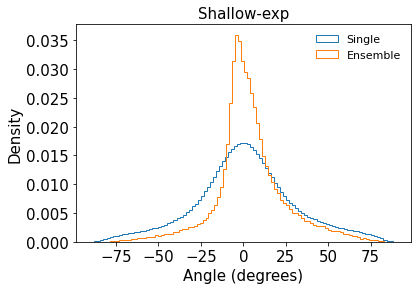

In [19]:
## Angles of ensemble models, comparison plot with angles of individual runs 

import matplotlib.pyplot as plt

sine_ensemble_flat = sine_ensemble.reshape(-1) 
sine_flat = sine.reshape(-1)

plt.xlabel('Angle (degrees)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.hist(sine_flat, 100, density=True, histtype='step', label = 'Single')
plt.hist(sine_ensemble_flat, 100, density=True, histtype='step', label = 'Ensemble')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Shallow-exp',fontsize=15)
plt.legend(loc='upper right', fontsize=11, frameon=False);

# ANECDOTAL EXAMPLES

In [ ]:
!pip install logomaker 

     |████████████████████████████████| 11.8 MB 4.9 MB/s 


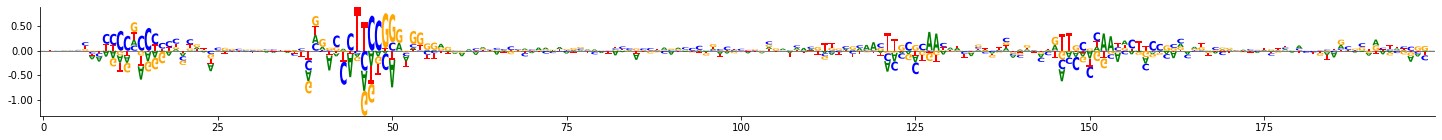

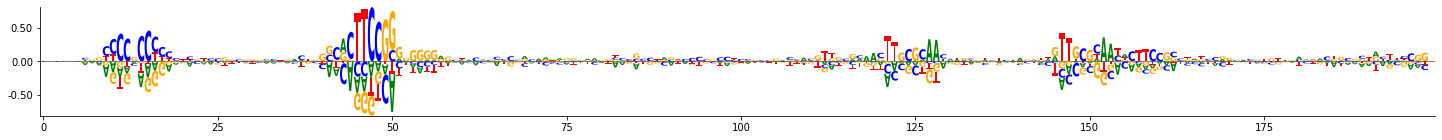

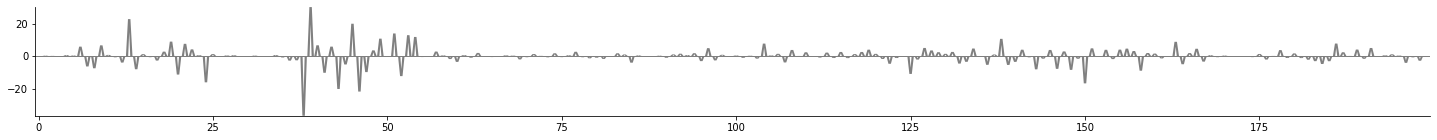

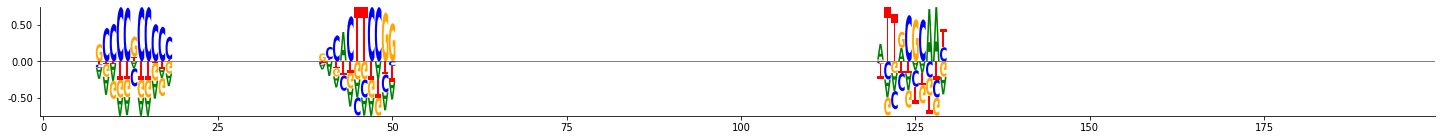

In [ ]:
saliency_map_raw_CORRECTED = np.array(saliency_map_raw) - 0.25 * np.sum(saliency_map_raw, axis=2, keepdims=True) 

s=9 #Pick a sequence 42
run_=49

X_50=[]
for i in range (0,len(saliency_map_raw_cumulative)):
    X_50.append(X)   
X_50=np.array(X_50)  

sine_dimensionsadapted=np.expand_dims(sine,3)[run_] * np.sqrt(np.sum(np.square(saliency_map_raw),axis=2,keepdims=True))

from matplotlib.ticker import FormatStrFormatter

import logomaker 
import pandas as pd

# PLOT for p=0 parameter (default classical saliency)
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=-0.333 parameter 
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw_CORRECTED[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT ground truth
N, L, A = sine_dimensionsadapted.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (sine_dimensionsadapted)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    fig = plt.gcf()


# PLOT ground truth
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

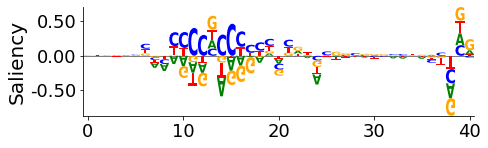

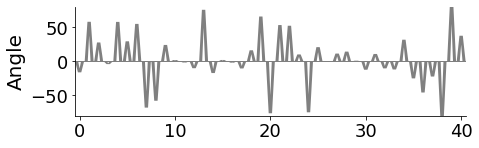

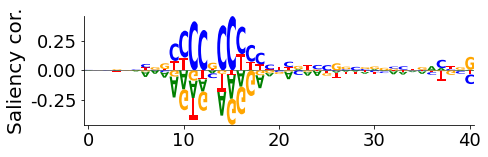

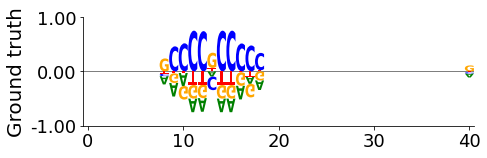

In [ ]:
saliency_map_raw
saliency_map_raw_CORRECTED = np.array(saliency_map_raw) - 0.25 * np.sum(saliency_map_raw, axis=2, keepdims=True) 

s=9 #Pick a sequence 42
run_=49

X_50=[]
for i in range (0,len(saliency_map_raw_cumulative)):
    X_50.append(X)   
X_50=np.array(X_50)  

sine_dimensionsadapted=np.expand_dims(sine,3)[run_] # np.sin(np.expand_dims(sine,3)/180*3.1416)[run_] * np.sqrt(np.sum(np.square(saliency_map_raw),axis=2,keepdims=True))
sine_dimensionsadapted2=np.expand_dims(sine,3)[run_]

from matplotlib.ticker import FormatStrFormatter

import logomaker 


#CUT
b1=0
b2=41
sine_dimensionsadapted_CUT=sine_dimensionsadapted[:,b1:b2]
sine_dimensionsadapted2_CUT=sine_dimensionsadapted2[:,b1:b2]
#X_model_CUT=X_model[:,b1:b2]
saliency_map_raw_CUT=saliency_map_raw[:,b1:b2]
saliency_map_raw_CORRECTED_CUT=saliency_map_raw_CORRECTED[:,b1:b2]



# PLOT for p=0 parameter (default classical saliency)
N, L, A = saliency_map_raw_CUT.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw_CUT[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.7,0.7))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.figure.set_size_inches(7, 2)
    ax.set_ylabel('Saliency', fontsize=20)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    fig = plt.gcf()

# PLOT angle
N, L, A = sine_dimensionsadapted_CUT.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (sine_dimensionsadapted_CUT)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    plt.ylim((-80,80)) 
    ax.figure.set_size_inches(7, 2)
    ax.set_ylabel('Angle', fontsize=20)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)    
    fig = plt.gcf()


'''# PLOT angle
N, L, A = sine_dimensionsadapted2_CUT.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (sine_dimensionsadapted2_CUT)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.figure.set_size_inches(7, 2)
    #ax.set_ylabel('Angle x L2', fontsize=20)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)    
    fig = plt.gcf()'''


# PLOT for p=-0.333 parameter 
N, L, A = saliency_map_raw_CUT.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw_CORRECTED_CUT[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.7,0.7)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.figure.set_size_inches(7, 2)
    ax.set_ylabel('Saliency cor.', fontsize=20)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)    
    fig = plt.gcf()



# PLOT ground truth
N, L, A = saliency_map_raw_CUT.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (np.swapaxes(X_model-0.25, 1,2)[:,b1:b2])[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    plt.ylim((-1.00,1.00)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.figure.set_size_inches(7, 2)
    ax.set_ylabel('Ground truth', fontsize=20)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)    
    fig = plt.gcf()